In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start = '2010-1-1')['Adj Close']

In [77]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-08-23,144.350006,4479.529785
2021-08-24,143.179993,4486.229980
2021-08-25,142.669998,4496.189941
2021-08-26,142.419998,4470.000000
2021-08-27,142.309998,4509.370117


<AxesSubplot:xlabel='Date'>

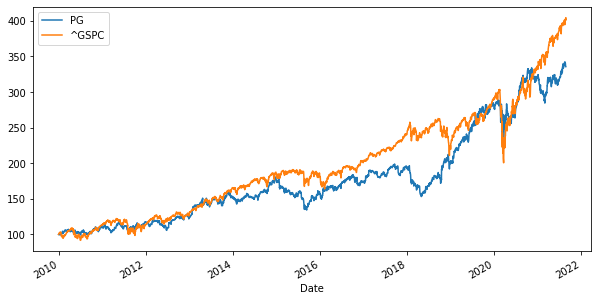

In [78]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

In [79]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [80]:
log_returns.mean() * 250

PG       0.103197
^GSPC    0.119054
dtype: float64

In [81]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.028776,0.017181
^GSPC,0.017181,0.029797


In [82]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.586733
^GSPC,0.586733,1.000000


In [83]:
num_assets = len(assets)

In [84]:
num_assets

2

In [85]:
arr = np.random.random(2)
arr

array([0.22507861, 0.63385742])

In [86]:
arr[0] + arr[1]

0.8589360258993188

In [87]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.48265831, 0.51734169])

In [88]:
weights[0] + weights[1]

1.0

In [89]:
np.sum(weights * log_returns.mean()) * 250

0.11140015388877601

In [90]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023258893422231298

In [91]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15250866671186689

In [92]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.11319401, 0.11082541, 0.11071685, 0.11610442, 0.10930805,
        0.10472446, 0.11408497, 0.1107881 , 0.11171538, 0.11024161,
        0.10770226, 0.1174726 , 0.11199302, 0.10792309, 0.11871094,
        0.10642151, 0.11319626, 0.10995875, 0.10565943, 0.103453  ,
        0.10914592, 0.11401254, 0.11379669, 0.11601125, 0.10943546,
        0.11167183, 0.10767252, 0.10990105, 0.10377079, 0.1112405 ,
        0.11420196, 0.11378247, 0.11473992, 0.11121895, 0.10430848,
        0.1110654 , 0.1098438 , 0.11168497, 0.10784834, 0.10603992,
        0.11737772, 0.10709039, 0.11344602, 0.10398588, 0.10951436,
        0.1134652 , 0.10457819, 0.10933438, 0.11831468, 0.11079901,
        0.10682794, 0.11417013, 0.11064201, 0.10447333, 0.11235575,
        0.10991998, 0.11139266, 0.10650961, 0.11221792, 0.10819215,
        0.1101607 , 0.11225864, 0.11321355, 0.11019907, 0.10670053,
        0.11401151, 0.11337213, 0.11267532, 0.10325466, 0.10947774,
        0.10724754, 0.11460002, 0.10665069, 0.11

In [93]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.113194,0.154205
1,0.110825,0.152392
2,0.110717,0.152393
3,0.116104,0.161065
4,0.109308,0.153084


In [94]:
portfolios.tail()

,Return,Volatility
995,0.113269,0.154320
996,0.115998,0.160730
997,0.113847,0.155315
998,0.108562,0.153953
999,0.116418,0.162088


Text(0, 0.5, 'Expected Return')

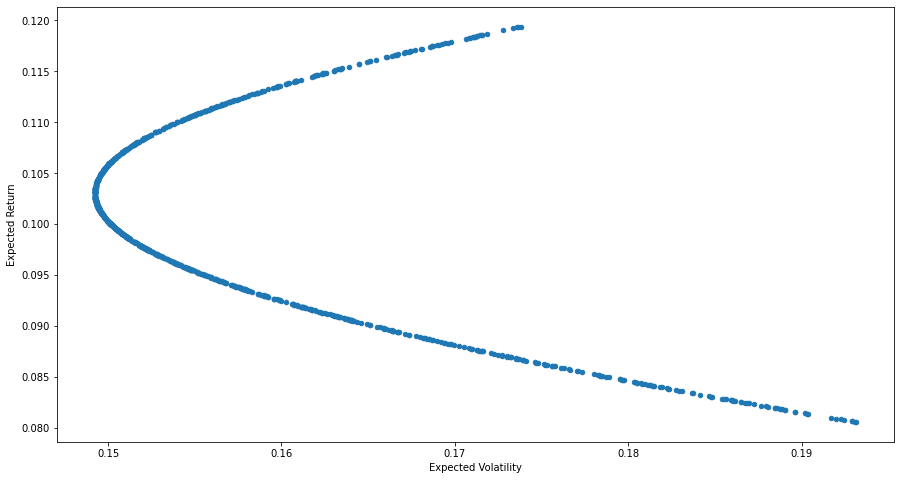

In [56]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,8))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')